## Qlearning Custom World 繳交作業版本
記得要先安裝 C:\Users\sj985\Downloads\NTNU-Reinforcement\gym-examples\gym_examples\envs\CustomWorld.py  
Site: https://www.gymlibrary.dev/content/environment_creation/  

Episode: 0
Episode: 0, steps: 2500, reward: -13041.0
Episode: 1
Episode: 1, steps: 2500, reward: -7541.0
Episode: 2
Episode: 2, steps: 2500, reward: -9944.0
Episode: 3
Episode: 3, steps: 2500, reward: -4827.0
Episode: 4
Episode: 4, steps: 2500, reward: -3220.0
Episode: 5
Episode: 5, steps: 2500, reward: -9474.0
Episode: 6
Episode: 6, steps: 2500, reward: 653.0
Episode: 7
Episode: 7, steps: 2500, reward: 6207.0
Episode: 8
Episode: 8, steps: 2500, reward: 8860.0
Episode: 9
Episode: 9, steps: 2500, reward: 12682.0
Episode: 10
Episode: 10, steps: 2500, reward: 22350.0
Episode: 11
Episode: 11, steps: 2500, reward: 28419.0
Episode: 12
Episode: 12, steps: 2500, reward: 22659.0
Episode: 13
Episode: 13, steps: 2500, reward: 56789.0
Episode: 14
Episode: 14, steps: 2500, reward: 40671.0
Episode: 15
Episode: 15, steps: 2500, reward: 52293.0
Episode: 16
Episode: 16, steps: 2500, reward: 54197.0
Episode: 17
Episode: 17, steps: 2500, reward: 48692.0
Episode: 18
Episode: 18, steps: 2500, reward: 68274

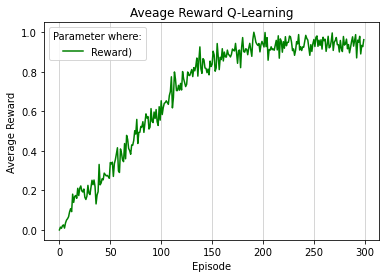

In [1]:
# Slide Example for Q-LEarning (RL-Course NTNU, Saeedvand)

import gym
import numpy as np
from gym.wrappers import FlattenObservation
from gym_examples.wrappers import RelativePosition
import time
import math
import matplotlib.pyplot as plt

# env = gym.make("Taxi-v3")#, render_mode="human")
env = gym.make('gym_examples/Assignment-v0', size=10)
env = FlattenObservation(env)

def plot(rewards):
    plt.figure(2)
    plt.title('Aveage Reward Q-Learning')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.plot(rewards, color='green', label='Reward)')
    plt.grid(axis='x', color='0.80')
    plt.legend(title='Parameter where:')
    plt.show()

def Q_value_initialize(state, action, type = 0):
    if type == 1:
        return np.ones((state, action))
    elif type == 0:
        return np.zeros((state, action))
    elif type == -1:
        return np.random.random((state, action))
   

def epsilon_greedy(Q, epsilon, s):
    if np.random.rand() < epsilon:
        action = np.argmax(Q[s, :]).item()
    else:
        action = env.action_space.sample() 

    return action

def normalize(list):
    xmin = min(list) 
    xmax=max(list)
    for i, x in enumerate(list):
        list[i] = (x-xmin) / (xmax-xmin)
    return list 

def Qlearning(alpha, gamma, epsilon, episodes, max_steps, EPS_START, EPS_END, EPS_DECAY, n_tests):
    n_states, n_actions = env.observation_space_state, env.action_space.n
    
    # print(n_states, n_actions)
    Q = Q_value_initialize(n_states, n_actions, type = 0)
    timestep_reward = []
    for episode in range(episodes):
        print(f"Episode: {episode}")
        s, info = env.reset() # read also state
        s = env.nplinspace[s[0],s[1],s[2],s[3]]
        
        EPS_START = 0.001
        EPS_END = 1
        EPS_DECAY = 10 
        epsilon_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * episode / EPS_DECAY)

        t = 0
        total_reward = 0
        while t < max_steps:
            t += 1
            a = epsilon_greedy(Q, epsilon_threshold, s)

            # Reward
            # -1 per step unless other reward is triggered.
            # +20 delivering passenger.
            # -10 executing “pickup” and “drop-off” actions illegally.
            
            s_, reward, terminated, truncated, info = env.step(a)
            state = env.nplinspace[s_[0],s_[1],s_[2],s_[3]]
            
            #s_, reward, done, info = env.step(a)
            total_reward += reward
            a_next = np.argmax(Q[state, :]).item()

            if terminated or truncated:
                Q[s, a] += alpha * (reward - Q[s, a])
            else:
                Q[s, a] += alpha * (reward + ( Q[state, a_next]) - Q[s, a])
            s, a = state, a_next
            
            if terminated or truncated:
                s, info = env.reset()
                s = env.nplinspace[s[0],s[1],s[2],s[3]]

        timestep_reward.append(total_reward/t)

        print(f"Episode: {episode}, steps: {t}, reward: {total_reward}")

        #print(f"Q values:\n{Q}\nTesting now:")
    # Test policy (no learning)
    if n_tests > 0:
        test_agent(Q, n_tests)
    
    plot(normalize(timestep_reward))
    return timestep_reward

#----------------------------------------------------
def test_agent(Q, n_tests = 0, delay=1):
    # env = gym.make('Taxi-v3', render_mode="human")
    env = gym.make('gym_examples/Assignment-v0', size=10)
    for testing in range(n_tests):
        print(f"Test #{testing}")
        s, info = env.reset()
        while True:
            time.sleep(delay)
            a = np.argmax(Q[s, :]).item()
            print(f"Chose action {a} for state {s}")
            s, reward, terminated, truncated, info = env.step(a)
            #time.sleep(1)

            if terminated or truncated:
                print("Finished!", reward)
                time.sleep(5)
                break

if __name__ == "__main__":
    alpha = 0.1 # learning rate
    gamma = 0.8 # discount factor
    epsilon = 0.01 # epsilon greedy exploration-explotation (smaller more random)
    episodes = 300
    
    EPS_START = 0.001
    EPS_END = 1
    EPS_DECAY = 10 

    max_steps = 2500 # to make it infinite make sure reach objective

    timestep_reward = Qlearning(
        alpha, gamma, epsilon, episodes, max_steps, EPS_START, EPS_END, EPS_DECAY, n_tests = 0)
  